
## Questions

We're going to be looking at the number of Calories in each drink. Calculate some quick summary statistics (e.g. the mean, the maximum and minimum).


In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1
Load in the dataset (starbucks_drinkMenu_expanded.csv), calling it drinks_content, and then briefly explore it, printing out: first 5 rows, last 5 rows, and then all of the data. Find out the dimensions of the data (number of rows and columns) and the column names.

In [161]:
drinks_content = pd.read_csv('/Users/anominity/Desktop/CodeClan/codeclan_homework_ChrisGlenshaw/week_12/day_2/4_homework/data/starbucks_drinkMenu_expanded.csv')


In [162]:
print(drinks_content.head())
print(drinks_content.tail())
print(drinks_content.shape)

         Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0                0.0             0   
2            0.1             0.0                0.0             0   
3            0.1             0.0                0.0             0   
4            0.1             0.1                0.0             5   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5                 0                   0   


### 2
Select the variables Beverage_category, Beverage, Beverage prep and Calories from the drinks_content data frame, and assign the selected columns to a new data frame called drinks. Check if there are any missing values anywhere in the data, and drop any rows containing them if there are.

In [163]:
drinks = drinks_content.loc[:, ["Beverage_category", 
                                "Beverage", 
                                "Beverage_prep", 
                                "Calories"]].copy()

In [164]:
drinks.isna().sum()

Beverage_category    0
Beverage             0
Beverage_prep        0
Calories             0
dtype: int64

### 3
In your drinks dataframe create a new variable (column) called calorie_diff, which stores the difference between 135 calories (135 calories = 10 cubes of sugar!) and the calories in each drink. (Hint: you’ll want to subtract the calories from 135 to see which drinks have more or less than 10 cubes of sugar).

In [165]:
drinks["calorie_diff"] = 135 - drinks["Calories"]

In [166]:
drinks

,Beverage_category,Beverage,Beverage_prep,Calories,calorie_diff
0,Coffee,Brewed Coffee,Short,3,132
1,Coffee,Brewed Coffee,Tall,4,131
2,Coffee,Brewed Coffee,Grande,5,130
3,Coffee,Brewed Coffee,Venti,5,130
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,65
...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,-185
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,-35
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,-65
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,-45


### 4
Summarise the mean number of calories in each beverage category.

In [167]:
(
    drinks
    .groupby("Beverage_category")
    .mean("Calories")
)

,Calories,calorie_diff
Beverage_category,,
Classic Espresso Drinks,140.172414,-5.172414
Coffee,4.250000,130.750000
Frappuccino® Blended Coffee,276.944444,-141.944444
Frappuccino® Blended Crème,233.076923,-98.076923
Frappuccino® Light Blended Coffee,162.500000,-27.500000
Shaken Iced Beverages,114.444444,20.555556
Signature Espresso Drinks,250.000000,-115.000000
Smoothies,282.222222,-147.222222
Tazo® Tea Drinks,177.307692,-42.307692


### 5
Harder - Which Beverage_prep type contains more than the average calories of all drinks? (Hint: to answer this, you’ll have to first figure out what the average calories across all drinks are, and then use that as a filter for the grouped Beverage_prep data).

In [168]:
mean_calories = drinks.Calories.mean()

drinks.groupby("Beverage_prep").mean("Calories") > mean_calories




,Calories,calorie_diff
Beverage_prep,,
2% Milk,True,False
Doppio,False,False
Grande,False,False
Grande Nonfat Milk,True,False
Short,False,False
Short Nonfat Milk,False,False
Solo,False,False
Soymilk,True,False
Tall,False,False


### 6
Harder - Which is the best type of coffee drink to get if you’re worried about consuming too many calories? (Hint: you can use pd.unique() on a column to get all unique values/levels of that column! Also remember that you can use isin() to subset with a list)

In [169]:
# coffee_drinks = drinks.loc[drinks["Beverage_category"].str.contains("Coffee" or "Espresso")].copy()
coffee_drinks = drinks.loc[drinks["Beverage_category"].isin(['Coffee', 
                                                             'Classic Espresso Drinks', 
                                                             'Signature Espresso Drinks',
                                                             'Frappuccino® Blended Coffee', 
                                                             'Frappuccino® Light Blended Coffee'])].copy()
coffee_drinks

,Beverage_category,Beverage,Beverage_prep,Calories,calorie_diff
0,Coffee,Brewed Coffee,Short,3,132
1,Coffee,Brewed Coffee,Tall,4,131
2,Coffee,Brewed Coffee,Grande,5,130
3,Coffee,Brewed Coffee,Venti,5,130
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,65
...,...,...,...,...,...
224,Frappuccino® Light Blended Coffee,Caramel,Grande Nonfat Milk,150,-15
225,Frappuccino® Light Blended Coffee,Caramel,Venti Nonfat Milk,200,-65
226,Frappuccino® Light Blended Coffee,Java Chip,Tall Nonfat Milk,150,-15
227,Frappuccino® Light Blended Coffee,Java Chip,Grande Nonfat Milk,220,-85


### 7
Filter the dataset drinks so we only take "Classic Espresso Drinks", and save this in a new data frame called espresso_drinks.

In [170]:
mask = drinks["Beverage_category"].isin(["Classic Espresso Drinks"])
espresso_drinks = drinks.loc[mask].copy()
espresso_drinks

,Beverage_category,Beverage,Beverage_prep,Calories,calorie_diff
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,65
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,35
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,65
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,35
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,-15
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,25
10,Classic Espresso Drinks,Caffè Latte,Grande Nonfat Milk,130,5
11,Classic Espresso Drinks,Caffè Latte,2% Milk,190,-55
12,Classic Espresso Drinks,Caffè Latte,Soymilk,150,-15
13,Classic Espresso Drinks,Caffè Latte,Venti Nonfat Milk,170,-35


### 8
Group your espresso_drinks data frame by the type of Beverage prep, and then find out the mean calories for each drink group.

In [171]:
espresso_drinks.groupby("Beverage_prep").mean("Calories")


,Calories,calorie_diff
Beverage_prep,,
2% Milk,184.375,-49.375
Doppio,10.000,125.000
Grande,15.000,120.000
Grande Nonfat Milk,150.000,-15.000
Short,5.000,130.000
Short Nonfat Milk,78.000,57.000
Solo,5.000,130.000
Soymilk,151.250,-16.250
Tall,10.000,125.000


### 9 
Get the same grouped mean Calories values as above, but this time sorted in descending order. (Hint: so you're able to sort the resulting groupby by the 'Calories' column you will want to ensure you get back a dataframe and not a series)

In [172]:
mean_esp_calories = espresso_drinks.groupby("Beverage_prep").mean("Calories")
mean_esp_calories.sort_values("Calories", ascending=False)


,Calories,calorie_diff
Beverage_prep,,
Venti Nonfat Milk,194.000,-59.000
2% Milk,184.375,-49.375
Soymilk,151.250,-16.250
Grande Nonfat Milk,150.000,-15.000
Tall Nonfat Milk,116.000,19.000
Short Nonfat Milk,78.000,57.000
Venti,25.000,110.000
Grande,15.000,120.000
Doppio,10.000,125.000


## Plots

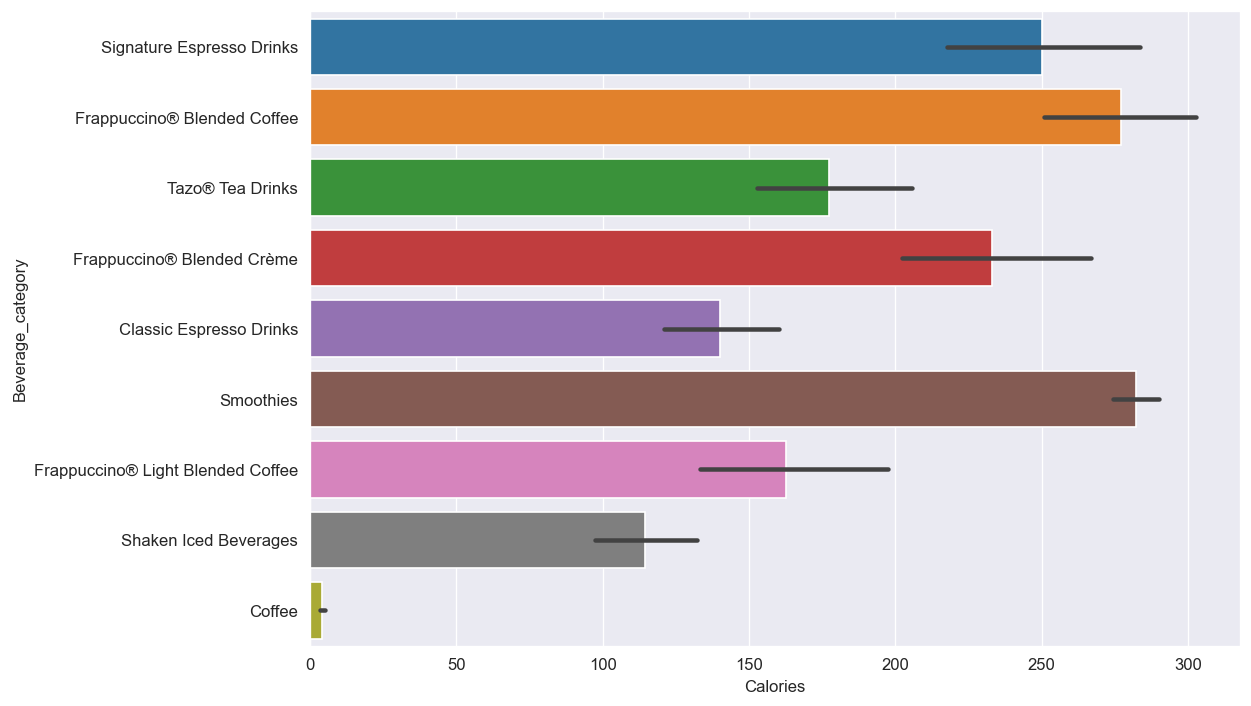

In [173]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10

sns.set_style("darkgrid")

sns.barplot(
    data=drinks.sort_values("Calories", ascending=False),
    y="Beverage_category",
    x="Calories",
    orient="h"
)
plt.show()

In [174]:
drinks_content.columns = drinks_content.columns.str.replace('_', '')
drinks_content.columns = drinks_content.columns.str.replace('(', '')
drinks_content.columns = drinks_content.columns.str.replace(')', '')
drinks_content.columns = drinks_content.columns.str.replace('%', '')
drinks_content.columns = drinks_content.columns.str.replace(' ', '')

/var/folders/wq/7m31z0711j3f5th13pnw3n780000gn/T/ipykernel_24560/1814204043.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  drinks_content.columns = drinks_content.columns.str.replace('(', '')
/var/folders/wq/7m31z0711j3f5th13pnw3n780000gn/T/ipykernel_24560/1814204043.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  drinks_content.columns = drinks_content.columns.str.replace(')', '')


In [175]:
drinks_content.columns

Index(['Beveragecategory', 'Beverage', 'Beverageprep', 'Calories', 'TotalFatg',
       'TransFatg', 'SaturatedFatg', 'Sodiummg', 'TotalCarbohydratesg',
       'Cholesterolmg', 'DietaryFibreg', 'Sugarsg', 'Proteing', 'VitaminADV',
       'VitaminCDV', 'CalciumDV', 'IronDV', 'Caffeinemg'],
      dtype='object')

In [176]:
mask = drinks_content["Beverage"].str.contains("Tazo")
drinks_content.replace(to_replace="varies", value=1000, inplace=True)
drinks_content.replace(to_replace="Varies", value=1000, inplace=True)

In [177]:
drinks_content["Caffeinmg"] = drinks_content["Caffeinemg"].astype(np.float64)

drinks_content.dtypes

Beveragecategory        object
Beverage                object
Beverageprep            object
Calories                 int64
TotalFatg               object
TransFatg              float64
SaturatedFatg          float64
Sodiummg                 int64
TotalCarbohydratesg      int64
Cholesterolmg            int64
DietaryFibreg            int64
Sugarsg                  int64
Proteing               float64
VitaminADV              object
VitaminCDV              object
CalciumDV               object
IronDV                  object
Caffeinemg              object
Caffeinmg              float64
dtype: object

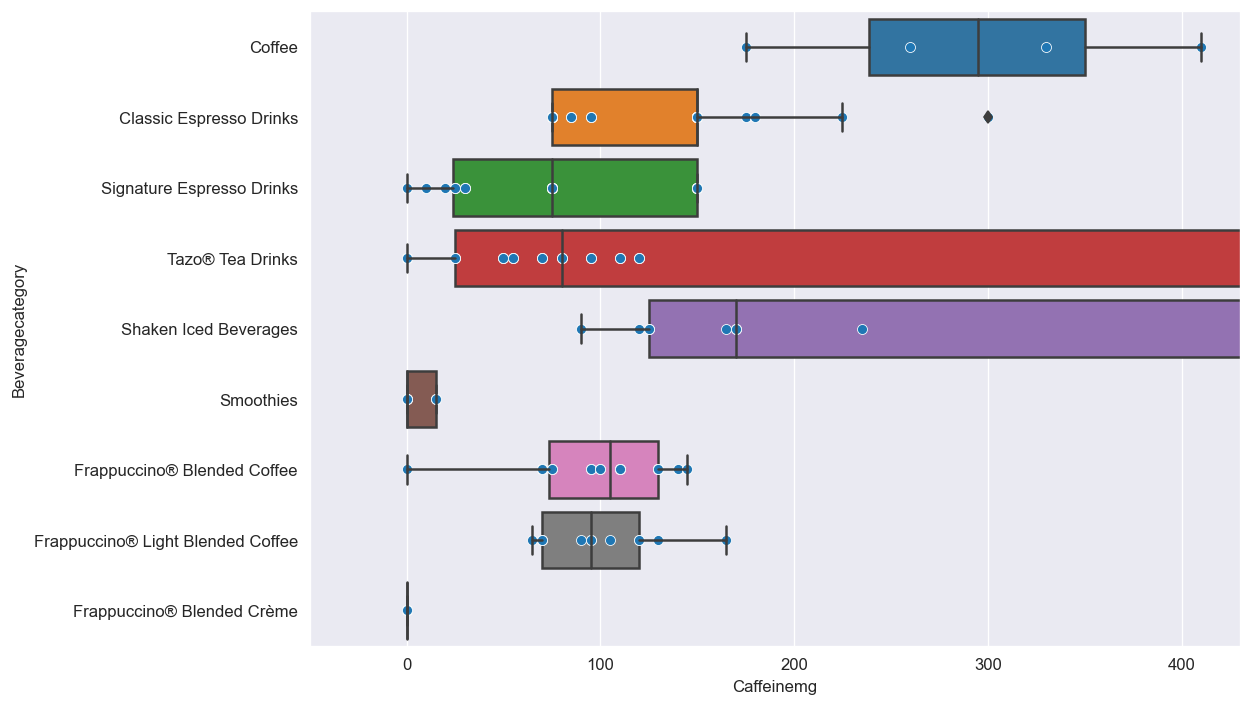

In [178]:
ax = sns.boxplot(
    data=drinks_content,
    x=drinks_content["Caffeinemg"].astype(np.float64),
    y="Beveragecategory",
)

ax = sns.scatterplot(
        data=drinks_content,
        x=drinks_content["Caffeinemg"].astype(np.float64),
        y="Beveragecategory",
        y_jitter=.2
    )

plt.xlim(right=430)
plt.show()